In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [5]:
eco_df = pd.read_csv('Concrete_Data.csv')


In [8]:
green_roof_df = pd.read_csv('green_roof.csv')


In [9]:
# View first 5 rows
print("Eco-Bricks Dataset:")
print(eco_df.head())

print("\nGreen Roof Dataset:")
print(green_roof_df.head())


Eco-Bricks Dataset:
       cement       water  superplasticizer  coarse_aggregate  fine_aggregate  \
0  312.362036  162.959305          7.851171       1001.810898      771.598763   
1  485.214292  187.933066          7.409364       1039.004419      841.629699   
2  419.598183  211.106209         27.187637        875.140370      828.048279   
3  379.597545  201.255742          7.486386        987.462230      646.169971   
4  246.805592  206.459280          8.158492        971.523795      644.774841   

   age  compressive_strength  embodied_CO2  energy_consumption  \
0   51            344.476684    307.856482         1628.413117   
1   71            374.295933    468.240201         2418.001368   
2   48            375.110054    436.206645         2476.993640   
3   19            473.843719    369.537736         1928.200394   
4  262            132.713930    246.983875         1329.311329   

   resource_consumption  
0           2256.582173  
1           2561.190840  
2           2361.0

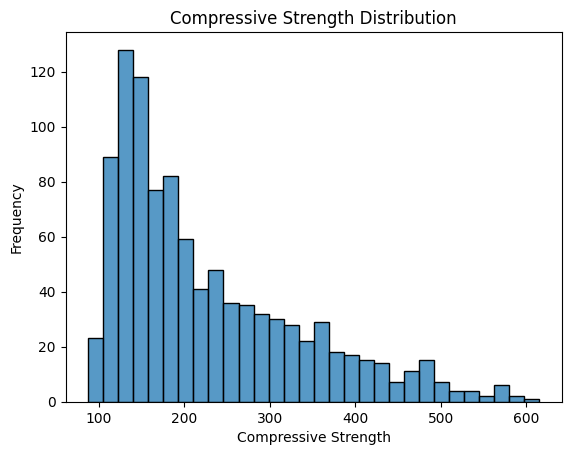

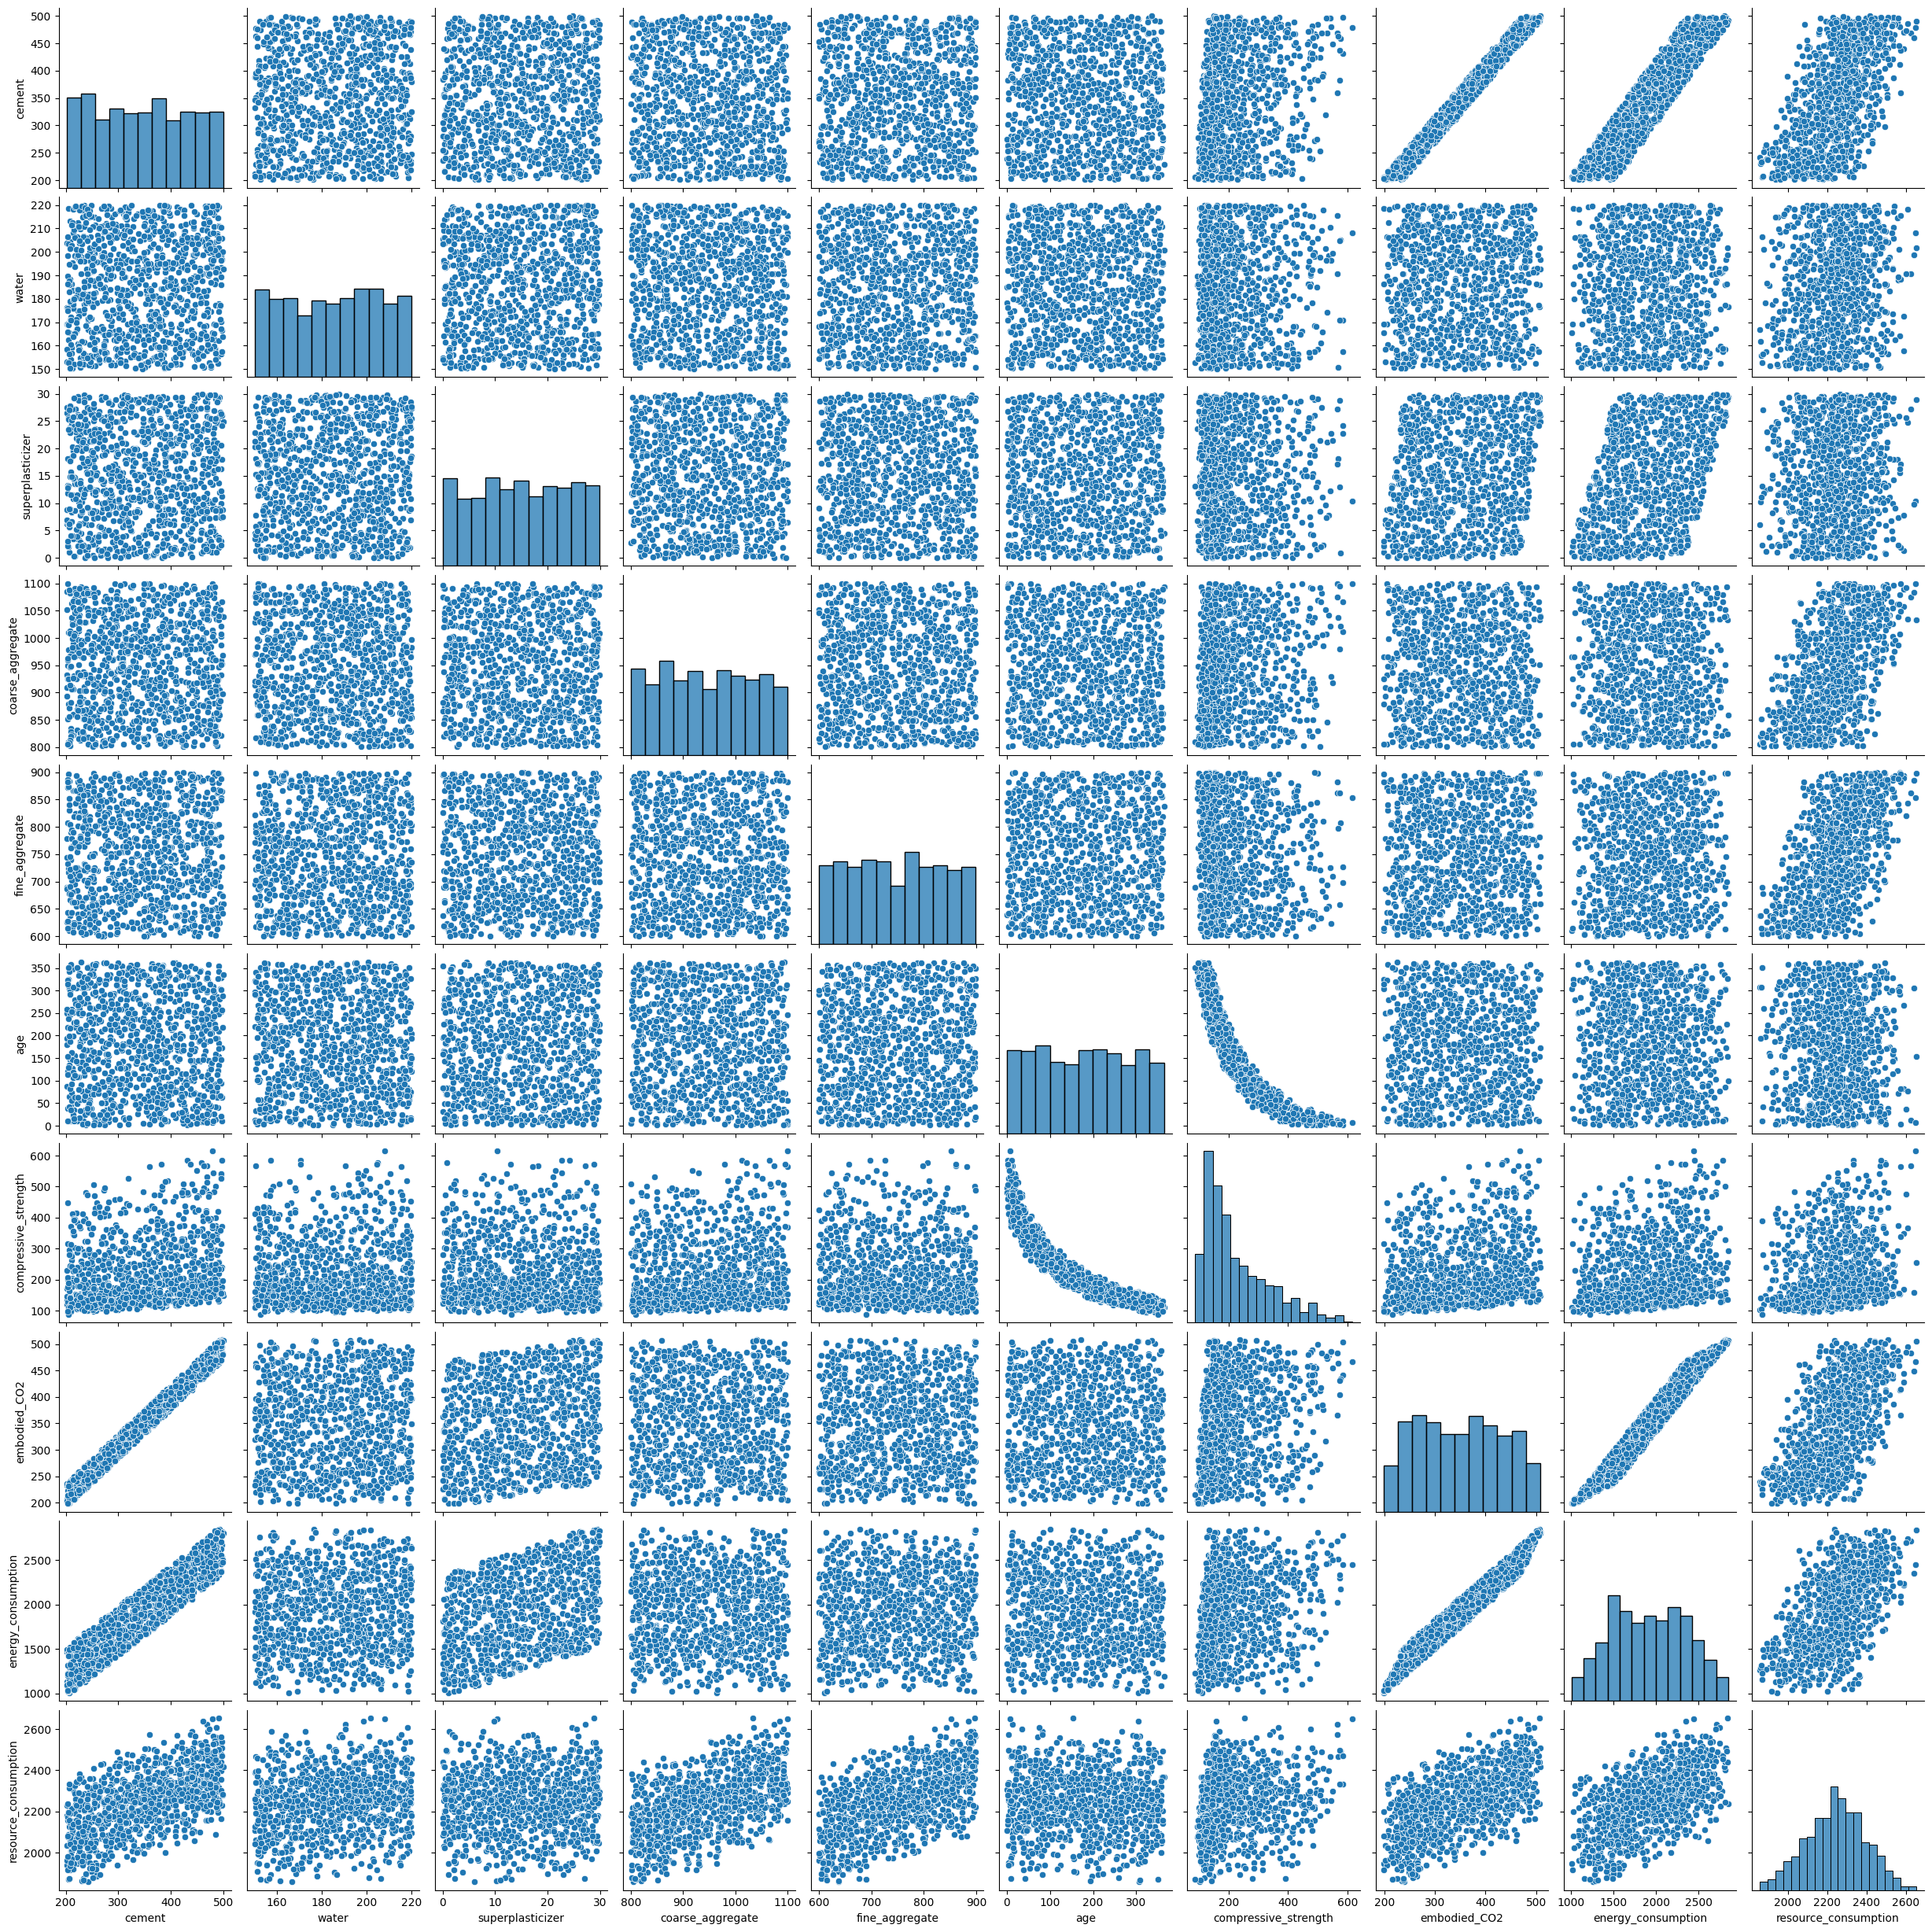

In [12]:
# Visualize the distribution of a key feature (e.g., compressive strength for eco-bricks)
sns.histplot(eco_df['compressive_strength'], bins=30)
plt.title("Compressive Strength Distribution")
plt.xlabel("Compressive Strength")
plt.ylabel("Frequency")
plt.show()

# Pairplot to visualize feature relationships
sns.pairplot(eco_df)
plt.show()


In [14]:
print(eco_df.columns)


Index(['cement', 'water', 'superplasticizer', 'coarse_aggregate',
       'fine_aggregate', 'age', 'compressive_strength', 'embodied_CO2',
       'energy_consumption', 'resource_consumption'],
      dtype='object')


In [16]:
categorical_columns = eco_df.select_dtypes(include=['object']).columns
print(categorical_columns)


Index([], dtype='object')


In [17]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()

for col in categorical_columns:
    eco_df[col] = label_enc.fit_transform(eco_df[col])


In [18]:
eco_df.fillna(eco_df.mean(), inplace=True)


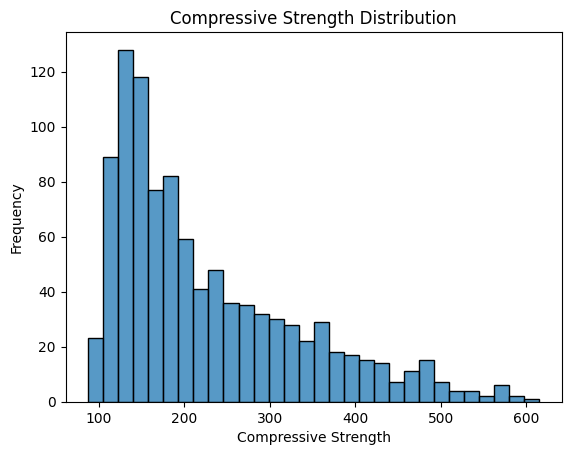

In [19]:
# Plot distribution of the target variable (compressive strength)
sns.histplot(eco_df['compressive_strength'], bins=30)
plt.title("Compressive Strength Distribution")
plt.xlabel("Compressive Strength")
plt.ylabel("Frequency")
plt.show()


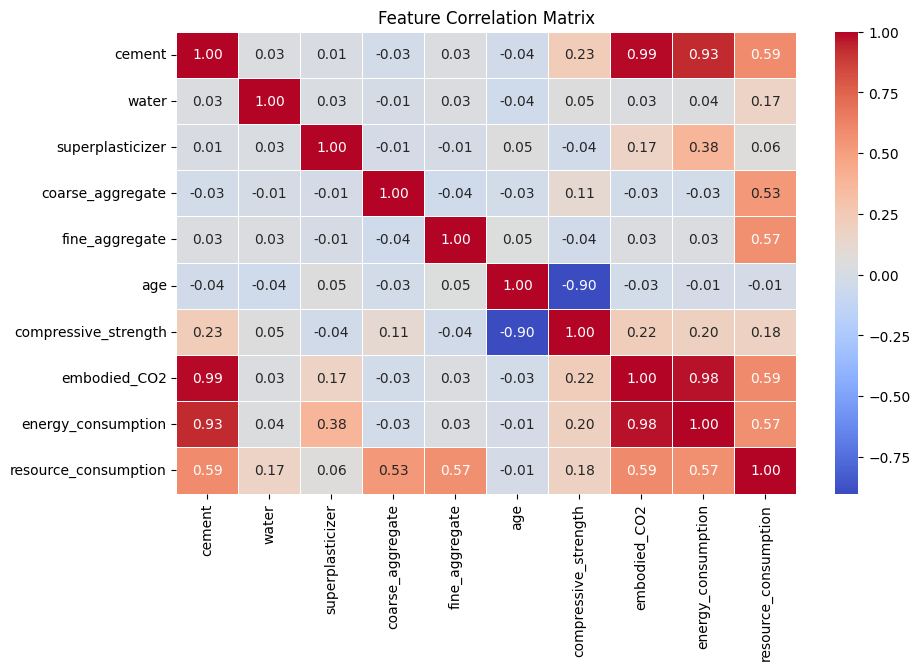

In [20]:
# Plot correlation matrix
corr_matrix = eco_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


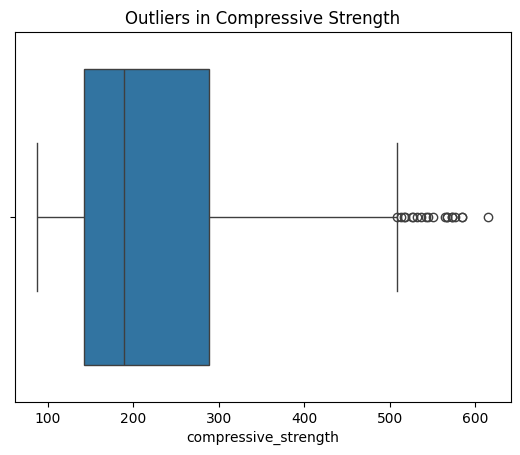

In [21]:
# Box plot to detect outliers in the target variable
sns.boxplot(x=eco_df['compressive_strength'])
plt.title("Outliers in Compressive Strength")
plt.show()


In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scale the features (excluding the target column)
X_scaled = scaler.fit_transform(eco_df.drop('compressive_strength', axis=1))


In [23]:
X = eco_df.drop('compressive_strength', axis=1)  # Features
y = eco_df['compressive_strength']  # Target variable


In [24]:
from sklearn.model_selection import train_test_split

# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [25]:
from sklearn.linear_model import LinearRegression

# Initialize the model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Predict using the model
y_pred_lr = lr_model.predict(X_test)


In [26]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the model
dt_model = DecisionTreeRegressor()

# Train the model
dt_model.fit(X_train, y_train)

# Predict using the model
y_pred_dt = dt_model.predict(X_test)


In [27]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor()

# Train the model
rf_model.fit(X_train, y_train)

# Predict using the model
y_pred_rf = rf_model.predict(X_test)


In [28]:
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression Evaluation
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("Linear Regression R²:", r2_score(y_test, y_pred_lr))

# Decision Tree Evaluation
print("Decision Tree RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print("Decision Tree R²:", r2_score(y_test, y_pred_dt))

# Random Forest Evaluation
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("Random Forest R²:", r2_score(y_test, y_pred_rf))


Linear Regression RMSE: 40.962145109579545
Linear Regression R²: 0.8606114302437615
Decision Tree RMSE: 16.419514115901944
Decision Tree R²: 0.9776033851708054
Random Forest RMSE: 10.42012544438189
Random Forest R²: 0.990979976416244


In [36]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Linear Regression Evaluation
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

# Decision Tree Evaluation
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

# Random Forest Evaluation
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Print the results
print("Linear Regression RMSE:", rmse_lr)
print("Linear Regression R²:", r2_lr)

print("\nDecision Tree RMSE:", rmse_dt)
print("Decision Tree R²:", r2_dt)

print("\nRandom Forest RMSE:", rmse_rf)
print("Random Forest R²:", r2_rf)


Linear Regression RMSE: 40.962145109579545
Linear Regression R²: 0.8606114302437615

Decision Tree RMSE: 16.419514115901944
Decision Tree R²: 0.9776033851708054

Random Forest RMSE: 10.42012544438189
Random Forest R²: 0.990979976416244


In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Define a smaller hyperparameter grid for faster execution
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Set up the Grid Search with 3-fold cross-validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,        # Use all available processors
    verbose=2,        # Display progress
    scoring='neg_mean_squared_error'
)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("✅ Best Hyperparameters:", grid_search.best_params_)

# Evaluate the best model on the test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"✅ RMSE of Best Model: {rmse:.4f}")
print(f"✅ R² Score of Best Model: {r2:.4f}")


Fitting 3 folds for each of 16 candidates, totalling 48 fits
✅ Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
✅ RMSE of Best Model: 10.2117
✅ R² Score of Best Model: 0.9913


In [37]:
from sklearn.model_selection import cross_val_score

# Perform Cross-Validation on Random Forest model
cv_scores = cross_val_score(best_rf_model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the average RMSE from cross-validation
cv_rmse = np.sqrt(-cv_scores.mean())
print("Random Forest Cross-Validation RMSE:", cv_rmse)


Random Forest Cross-Validation RMSE: 10.618191679569252


In [38]:
import joblib

# Save the model to a file
joblib.dump(best_rf_model, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [40]:
# Load the saved model
loaded_model = joblib.load('random_forest_model.pkl')

# Use the loaded model to make predictions
y_pred_loaded = loaded_model.predict(X_test)
